# Exploratory Data Analysis for PD Test Sample


In [1]:
import pymongo
from pymongo import MongoClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import plotly.express as px 

#### Connect to MongoDB

In [2]:
client = MongoClient('localhost', 27017)
db = client['pd-test-sample']
collection = db.outputItems

In [3]:
data = pd.DataFrame(list(collection.find()))
data.head()

,_id,url,text,school_id,depth,image_urls,file_urls,file_text,images,files
0,6202af4e0f994ceb8494478a,https://www.oxfordcountysheriff.com/about,About \n \n \n \n \n \n \n \n \n \n \n \n \n \...,642050.0,1,[https://lirp.cdn-website.com/3653612c/dms3rep...,[],[],[{'url': 'https://lirp.cdn-website.com/3653612...,[]
1,6202af560f994ceb84944792,https://nlrpolice.org/pay-fines/,Skip to content\n \n \n \n \n \n \n \n \n \n \...,630792.0,1,[https://nlrpolice.org/wp-content/uploads/2020...,[],[],[{'url': 'https://nlrpolice.org/wp-content/upl...,[]
2,6202af560f994ceb84944794,https://www.moundvillealabama.com/government/d...,Home\n Latest News\n Community\n City Services...,630312.0,1,[https://res.cloudinary.com/caboose/image/uplo...,[],[],[{'url': 'https://res.cloudinary.com/caboose/i...,[]
3,6202af580f994ceb84944796,http://www.hcsheriff.gov/uniform_services/sher...,Submit a Tip\n \n General Info\n \n \n About t...,636789.0,1,[http://www.hcsheriff.gov/images/hcso_home_hea...,[http://hcsheriff.gov\pressreleases\HCSO_Publi...,"[, , , , ]",[],[{'url': 'http://hcsheriff.gov/cid/annual_repo...
4,6202af5a0f994ceb84944798,https://cityofadamswi.org/accessibility/,HomeGovernment\nAdams County GovernmentCity Co...,631293.0,1,[https://cityofadamswi.org/wp-content/uploads/...,[],[],[{'url': 'https://cityofadamswi.org/wp-content...,[]


In [4]:
data.groupby('school_id').sum()

,depth
school_id,
630312.0,1
630792.0,1
631293.0,1
632322.0,1
636560.0,1
636789.0,7991
636992.0,1
637796.0,2743
640471.0,166


In [5]:
data["image_count"] = data["image_urls"].apply(len)
data["file_count"] = data["file_urls"].apply(len)

(array([   0.,   24.,   62.,  284., 1677.,  742.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

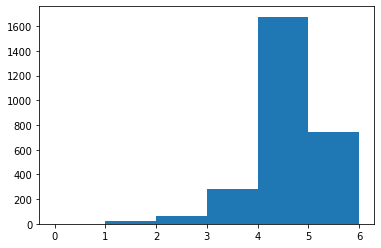

In [6]:
plt.hist(data.depth, bins=np.arange(6.1))

(array([ 804.,  328., 1540.,    8.,   11.,   74.,    9.,    5.,    7.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           3.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70., 75., 80., 85., 90., 95.]),
 <BarContainer object of 19 artists>)

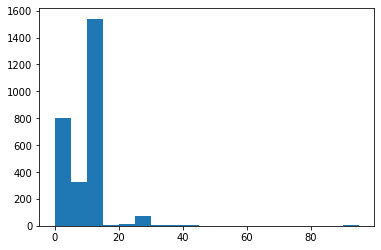

In [7]:
plt.hist(data.image_count, bins=np.arange(0, 95.1, 5))

(array([7.470e+02, 3.790e+02, 1.615e+03, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

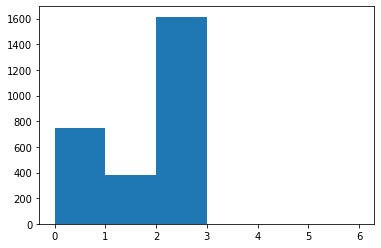

In [8]:
plt.hist(data.file_count, bins=np.arange(6.1))